In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.image as mpimg

In [3]:
imdb_df = pd.read_csv('imdb_df.csv')
wiki_df = pd.read_csv('wiki_df.csv')

In [4]:
imdb_df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_id
0,693726,1968,['01/nm0000001_rm124825600_1899-5-10_1968.jpg'],1.0,['Fred Astaire'],[[1072.926 161.838 1214.784 303.696]],1.459693,1.118973,6488
1,693726,1970,['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'],1.0,['Fred Astaire'],[[477.184 100.352 622.592 245.76 ]],2.543198,1.852008,6488
2,693726,1968,['01/nm0000001_rm577153792_1899-5-10_1968.jpg'],1.0,['Fred Astaire'],[[114.96964309 114.96964309 451.68657236 451.6...,3.455579,2.985660,6488
3,693726,1968,['01/nm0000001_rm946909184_1899-5-10_1968.jpg'],1.0,['Fred Astaire'],[[622.88550564 424.21750384 844.33900767 645.6...,1.872117,NaN,6488
4,693726,1968,['01/nm0000001_rm980463616_1899-5-10_1968.jpg'],1.0,['Fred Astaire'],[[1013.85900236 233.88204221 1201.5861278 4...,1.158766,NaN,6488


In [5]:
wiki_df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score
0,723671,2009,['17/10000217_1981-05-05_2009.jpg'],1.0,['Sami Jauhojärvi'],[[111.29109473 111.29109473 252.66993082 252.6...,4.300962,NaN
1,703186,1964,['48/10000548_1925-04-04_1964.jpg'],1.0,['Dettmar Cramer'],[[252.4833023 126.68165115 354.53192596 228.7...,2.645639,1.949248
2,711677,2008,['12/100012_1948-07-03_2008.jpg'],1.0,['Marc Okrand'],[[113.52 169.84 366.08 422.4 ]],4.329329,NaN
3,705061,1961,['65/10001965_1930-05-23_1961.jpg'],1.0,['Aleksandar Matanović'],[[ 1 1 634 440]],-inf,NaN
4,720044,2012,['16/10002116_1971-05-31_2012.jpg'],0.0,['Diana Damrau'],[[171.61031405 75.5745124 266.76611571 170.7...,3.408442,NaN


In [6]:
#Cannot combine just yet because full_path column doesn't account for the fact that pictures are in seperate folders, 
#The number of columns also do not match
#Problem with dob

In [19]:
print(imdb_df.full_path[0])

['01/nm0000001_rm124825600_1899-5-10_1968.jpg']


## Converting Matlab Datetime to Actual Date Time

In [69]:
def convert_to_date(mat_num):
    date = dt.datetime.fromordinal(int(mat_num)) + dt.timedelta(days=mat_num%1) - dt.timedelta(days = 366)
    return date.year

In [78]:
imdb_df = imdb_df.loc[imdb_df.dob > 600000] #Some records have dob's that make no sense 

In [84]:
imdb_df.dob = imdb_df.dob.map(lambda x: convert_to_date(x))

In [86]:
imdb_df.head(15)

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_id
0,1899,1968,['01/nm0000001_rm124825600_1899-5-10_1968.jpg'],1.0,['Fred Astaire'],[[1072.926 161.838 1214.784 303.696]],1.459693,1.118973,6488
1,1899,1970,['01/nm0000001_rm3343756032_1899-5-10_1970.jpg'],1.0,['Fred Astaire'],[[477.184 100.352 622.592 245.76 ]],2.543198,1.852008,6488
2,1899,1968,['01/nm0000001_rm577153792_1899-5-10_1968.jpg'],1.0,['Fred Astaire'],[[114.96964309 114.96964309 451.68657236 451.6...,3.455579,2.985660,6488
3,1899,1968,['01/nm0000001_rm946909184_1899-5-10_1968.jpg'],1.0,['Fred Astaire'],[[622.88550564 424.21750384 844.33900767 645.6...,1.872117,NaN,6488
4,1899,1968,['01/nm0000001_rm980463616_1899-5-10_1968.jpg'],1.0,['Fred Astaire'],[[1013.85900236 233.88204221 1201.5861278 4...,1.158766,NaN,6488
5,1924,1991,['02/nm0000002_rm1075631616_1924-9-16_1991.jpg'],0.0,['Lauren Bacall'],[[ 686.67682059 458.46721373 1198.10043604 9...,3.490563,1.345335,11516
6,1924,2004,['02/nm0000002_rm1346607872_1924-9-16_2004.jpg'],0.0,['Lauren Bacall'],[[ 78.23569407 52.33512938 194.25423516 168.3...,3.479189,NaN,11516
7,1924,2004,['02/nm0000002_rm1363385088_1924-9-16_2004.jpg'],0.0,['Lauren Bacall'],[[ 64.30867104 64.30867104 207.26768087 207.2...,3.870171,NaN,11516
8,1924,1991,['02/nm0000002_rm1411175936_1924-9-16_1991.jpg'],0.0,['Lauren Bacall'],[[ 212.76723692 1055.64418461 526.79809231 13...,3.786499,3.629704,11516
9,1924,2004,['02/nm0000002_rm1447271168_1924-9-16_2004.jpg'],0.0,['Lauren Bacall'],[[242.176 49.664 278.528 86.016]],3.472944,2.945133,11516


In [89]:
imdb_df.describe() #minimum dob is 1732?

,dob,photo_taken,gender,face_score,second_face_score,celeb_id
count,460594.000000,460594.000000,452132.000000,4.605940e+05,213743.000000,460594.000000
mean,1968.559488,2005.460894,0.581996,-inf,2.452880,10116.203153
std,15.242675,9.054951,0.493231,NaN,1.064413,5742.111796
min,1732.000000,1961.000000,0.000000,-inf,0.730926,1.000000
25%,1961.000000,2004.000000,0.000000,1.757934e+00,1.583693,5294.000000
50%,1971.000000,2008.000000,1.000000,2.980162e+00,2.355155,10066.000000
75%,1979.000000,2011.000000,1.000000,4.006462e+00,3.228034,14922.000000
max,2012.000000,2015.000000,1.000000,7.381689e+00,6.395435,20284.000000


In [93]:
imdb_df['age'] = imdb_df.photo_taken - imdb_df.dob

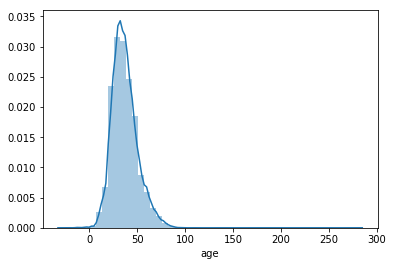

In [98]:
sns.distplot(imdb_df.age)

In [106]:
imdb_df = imdb_df.loc[imdb_df.age<101] #Removing values where ages are greater than 100

In [107]:
imdb_df= imdb_df.loc[imdb_df.age>-1]

In [108]:
imdb_df.shape

(460070, 10)

In [110]:
wiki_df.dob = wiki_df.dob.map(lambda x: convert_to_date(x))

In [111]:
wiki_df['age'] = wiki_df.photo_taken - wiki_df.dob

In [114]:
wiki_df = wiki_df.loc[wiki_df.age < 101]

In [115]:
wiki_df = wiki_df.loc[wiki_df.age > -1]

In [118]:
wiki_df.describe()

,dob,photo_taken,gender,face_score,second_face_score,age
count,60630.000000,60630.000000,58135.000000,6.063000e+04,4090.000000,60630.000000
mean,1962.602787,1999.490830,0.784020,-inf,2.010119,36.888042
std,25.294459,20.340145,0.411504,NaN,0.981431,16.779199
min,1848.000000,1940.000000,0.000000,-inf,0.731419,0.000000
25%,1946.000000,1996.000000,1.000000,-inf,1.167018,24.000000
50%,1969.000000,2009.000000,1.000000,2.539019e+00,1.839220,31.000000
75%,1984.000000,2012.000000,1.000000,3.796020e+00,2.657677,47.000000
max,2014.000000,2015.000000,1.000000,7.081268e+00,5.463147,100.000000


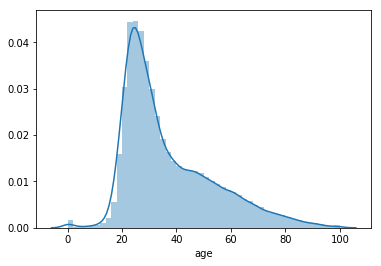

In [120]:
sns.distplot(wiki_df.age)

## Correcting IMDB and Wiki paths to reflect my local system path

In [144]:
imdb_df.full_path = imdb_df.full_path.apply(lambda x: x.split('[')[-1].split(']')[0])

In [145]:
wiki_df.full_path = wiki_df.full_path.apply(lambda x: x.split('[')[-1].split(']')[0])

In [146]:
imdb_df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_id,age
0,1899,1968,'01/nm0000001_rm124825600_1899-5-10_1968.jpg',1.0,['Fred Astaire'],[[1072.926 161.838 1214.784 303.696]],1.459693,1.118973,6488,69
1,1899,1970,'01/nm0000001_rm3343756032_1899-5-10_1970.jpg',1.0,['Fred Astaire'],[[477.184 100.352 622.592 245.76 ]],2.543198,1.852008,6488,71
2,1899,1968,'01/nm0000001_rm577153792_1899-5-10_1968.jpg',1.0,['Fred Astaire'],[[114.96964309 114.96964309 451.68657236 451.6...,3.455579,2.985660,6488,69
3,1899,1968,'01/nm0000001_rm946909184_1899-5-10_1968.jpg',1.0,['Fred Astaire'],[[622.88550564 424.21750384 844.33900767 645.6...,1.872117,NaN,6488,69
4,1899,1968,'01/nm0000001_rm980463616_1899-5-10_1968.jpg',1.0,['Fred Astaire'],[[1013.85900236 233.88204221 1201.5861278 4...,1.158766,NaN,6488,69


In [147]:
wiki_df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,1981,2009,'17/10000217_1981-05-05_2009.jpg',1.0,['Sami Jauhojärvi'],[[111.29109473 111.29109473 252.66993082 252.6...,4.300962,NaN,28
1,1925,1964,'48/10000548_1925-04-04_1964.jpg',1.0,['Dettmar Cramer'],[[252.4833023 126.68165115 354.53192596 228.7...,2.645639,1.949248,39
2,1948,2008,'12/100012_1948-07-03_2008.jpg',1.0,['Marc Okrand'],[[113.52 169.84 366.08 422.4 ]],4.329329,NaN,60
3,1930,1961,'65/10001965_1930-05-23_1961.jpg',1.0,['Aleksandar Matanović'],[[ 1 1 634 440]],-inf,NaN,31
4,1971,2012,'16/10002116_1971-05-31_2012.jpg',0.0,['Diana Damrau'],[[171.61031405 75.5745124 266.76611571 170.7...,3.408442,NaN,41


In [179]:
imdb_df.full_path = imdb_df.full_path.apply(lambda x: 'data/imdb/' + x.replace("'", ""))
wiki_df.full_path = wiki_df.full_path.apply(lambda x: 'data/wiki/' + x.replace("'", ""))
#Adding to the full path, so that system can distinguish between imdb pictures and wiki pictures

In [180]:
imdb_df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_id,age
0,1899,1968,data/imdb/01/nm0000001_rm124825600_1899-5-10_1...,1.0,['Fred Astaire'],[[1072.926 161.838 1214.784 303.696]],1.459693,1.118973,6488,69
1,1899,1970,data/imdb/01/nm0000001_rm3343756032_1899-5-10_...,1.0,['Fred Astaire'],[[477.184 100.352 622.592 245.76 ]],2.543198,1.852008,6488,71
2,1899,1968,data/imdb/01/nm0000001_rm577153792_1899-5-10_1...,1.0,['Fred Astaire'],[[114.96964309 114.96964309 451.68657236 451.6...,3.455579,2.985660,6488,69
3,1899,1968,data/imdb/01/nm0000001_rm946909184_1899-5-10_1...,1.0,['Fred Astaire'],[[622.88550564 424.21750384 844.33900767 645.6...,1.872117,NaN,6488,69
4,1899,1968,data/imdb/01/nm0000001_rm980463616_1899-5-10_1...,1.0,['Fred Astaire'],[[1013.85900236 233.88204221 1201.5861278 4...,1.158766,NaN,6488,69


In [181]:
wiki_df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,1981,2009,data/wiki/17/10000217_1981-05-05_2009.jpg,1.0,['Sami Jauhojärvi'],[[111.29109473 111.29109473 252.66993082 252.6...,4.300962,NaN,28
1,1925,1964,data/wiki/48/10000548_1925-04-04_1964.jpg,1.0,['Dettmar Cramer'],[[252.4833023 126.68165115 354.53192596 228.7...,2.645639,1.949248,39
2,1948,2008,data/wiki/12/100012_1948-07-03_2008.jpg,1.0,['Marc Okrand'],[[113.52 169.84 366.08 422.4 ]],4.329329,NaN,60
3,1930,1961,data/wiki/65/10001965_1930-05-23_1961.jpg,1.0,['Aleksandar Matanović'],[[ 1 1 634 440]],-inf,NaN,31
4,1971,2012,data/wiki/16/10002116_1971-05-31_2012.jpg,0.0,['Diana Damrau'],[[171.61031405 75.5745124 266.76611571 170.7...,3.408442,NaN,41


In [183]:
imdb_df.drop('celeb_id', axis = 1, inplace= True)

In [185]:
full_df = pd.concat([imdb_df, wiki_df])

In [188]:
full_df

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
0,1899,1968,data/imdb/01/nm0000001_rm124825600_1899-5-10_1...,1.0,['Fred Astaire'],[[1072.926 161.838 1214.784 303.696]],1.459693,1.118973,69
1,1899,1970,data/imdb/01/nm0000001_rm3343756032_1899-5-10_...,1.0,['Fred Astaire'],[[477.184 100.352 622.592 245.76 ]],2.543198,1.852008,71
2,1899,1968,data/imdb/01/nm0000001_rm577153792_1899-5-10_1...,1.0,['Fred Astaire'],[[114.96964309 114.96964309 451.68657236 451.6...,3.455579,2.985660,69
3,1899,1968,data/imdb/01/nm0000001_rm946909184_1899-5-10_1...,1.0,['Fred Astaire'],[[622.88550564 424.21750384 844.33900767 645.6...,1.872117,NaN,69
4,1899,1968,data/imdb/01/nm0000001_rm980463616_1899-5-10_1...,1.0,['Fred Astaire'],[[1013.85900236 233.88204221 1201.5861278 4...,1.158766,NaN,69
5,1924,1991,data/imdb/02/nm0000002_rm1075631616_1924-9-16_...,0.0,['Lauren Bacall'],[[ 686.67682059 458.46721373 1198.10043604 9...,3.490563,1.345335,67
6,1924,2004,data/imdb/02/nm0000002_rm1346607872_1924-9-16_...,0.0,['Lauren Bacall'],[[ 78.23569407 52.33512938 194.25423516 168.3...,3.479189,NaN,80
7,1924,2004,data/imdb/02/nm0000002_rm1363385088_1924-9-16_...,0.0,['Lauren Bacall'],[[ 64.30867104 64.30867104 207.26768087 207.2...,3.870171,NaN,80
8,1924,1991,data/imdb/02/nm0000002_rm1411175936_1924-9-16_...,0.0,['Lauren Bacall'],[[ 212.76723692 1055.64418461 526.79809231 13...,3.786499,3.629704,67
9,1924,2004,data/imdb/02/nm0000002_rm1447271168_1924-9-16_...,0.0,['Lauren Bacall'],[[242.176 49.664 278.528 86.016]],3.472944,2.945133,80


In [189]:
full_df.to_csv('full_df.csv', index= False)

# EDA

In [2]:
full_df = pd.read_csv('full_df.csv')

In [3]:
full_df.describe()

,dob,photo_taken,gender,face_score,second_face_score,age
count,520700.000000,520700.000000,509752.000000,5.207000e+05,217645.000000,520700.000000
mean,1967.859278,2004.795967,0.605088,-inf,2.444748,36.936689
std,16.823458,11.108794,0.488832,NaN,1.064595,13.592457
min,1848.000000,1940.000000,0.000000,-inf,0.730926,0.000000
25%,1960.000000,2004.000000,0.000000,1.661038e+00,1.574402,27.000000
50%,1971.000000,2008.000000,1.000000,2.938205e+00,2.345655,35.000000
75%,1980.000000,2011.000000,1.000000,3.986436e+00,3.219482,45.000000
max,2014.000000,2015.000000,1.000000,7.381689e+00,6.395435,100.000000


In [5]:
#Looking for strange data 
full_df.loc[full_df.dob < 1850]

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
464014,1849,1948,data/wiki/91/9504991_1849-05-09_1948.jpg,1.0,['Edward Clouston'],[[1 1 1 1]],-inf,NaN,99
514419,1848,1947,data/wiki/77/19844977_1848-06-24_1947.jpg,1.0,['Joseph M. Merrow'],[[1 1 1 1]],-inf,NaN,99


In [6]:
#Looking for pictures with unfavorable face_scores
full_df.loc[full_df.face_score == -np.inf]

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
30,1924,2007,data/imdb/02/nm0000002_rm3587741952_1924-9-16_...,0.0,['Lauren Bacall'],[[ 1 1 323 485]],-inf,NaN,83
49,1934,1963,data/imdb/03/nm0000003_rm2017653760_1934-9-28_...,0.0,['Brigitte Bardot'],[[ 1 1 2126 4842]],-inf,NaN,29
54,1934,1963,data/imdb/03/nm0000003_rm2135094272_1934-9-28_...,0.0,['Brigitte Bardot'],[[ 1 1 5280 1331]],-inf,NaN,29
58,1934,1965,data/imdb/03/nm0000003_rm3261053696_1934-9-28_...,0.0,['Brigitte Bardot'],[[ 1 1 1023 1023]],-inf,NaN,31
76,1949,1978,data/imdb/04/nm0000004_rm1744744448_1949-1-24_...,1.0,['John Belushi'],[[ 1 1 1381 2048]],-inf,NaN,29
96,1924,1972,data/imdb/08/nm0000008_rm1221625088_1924-4-3_1...,1.0,['Marlon Brando'],[[ 1 1 1023 878]],-inf,NaN,48
98,1924,1972,data/imdb/08/nm0000008_rm1271956736_1924-4-3_1...,1.0,['Marlon Brando'],[[ 1 1 722 1023]],-inf,NaN,48
99,1924,1972,data/imdb/08/nm0000008_rm1288733952_1924-4-3_1...,1.0,['Marlon Brando'],[[ 1 1 818 1023]],-inf,NaN,48
105,1924,1972,data/imdb/08/nm0000008_rm1456506112_1924-4-3_1...,1.0,['Marlon Brando'],[[ 1 1 1023 804]],-inf,NaN,48
107,1924,1972,data/imdb/08/nm0000008_rm1607501056_1924-4-3_1...,1.0,['Marlon Brando'],[[ 1 1 550 1023]],-inf,NaN,48


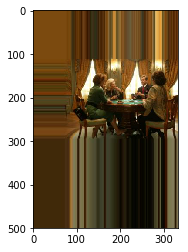

In [8]:
#Examining what a picture with a face_score of -inf looks like, barely visible face
import matplotlib.image as mpimg
img=mpimg.imread(full_df.iloc[30].full_path)
imgplot = plt.imshow(img)

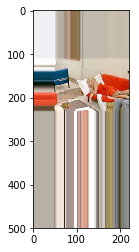

In [9]:
import matplotlib.image as mpimg
img=mpimg.imread(full_df.iloc[49].full_path)
imgplot = plt.imshow(img)

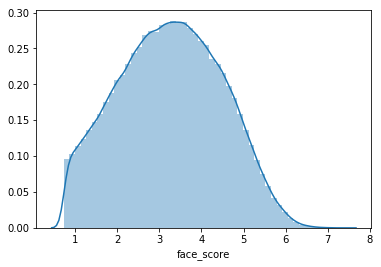

In [4]:
#Removing images with face scores of -inf from dataframe
full_df = full_df.loc[full_df.face_score > -np.inf]
sns.distplot(full_df.face_score) #Distribution of face scores

In [21]:
full_df.shape

(442219, 9)

In [59]:
def examine_faces(face_score):
    import matplotlib.image as mpimg
    indices = full_df.index[((full_df['face_score'] < face_score) & (full_df['face_score'] > face_score - 1))][0:5]
    c = 1
    plt.figure(figsize= (15, 15))
    for i in indices:
        plt.subplot(1, len(indices), c)
        img=mpimg.imread(full_df.iloc[i].full_path)
        imgplot = plt.imshow(img)
        c += 1

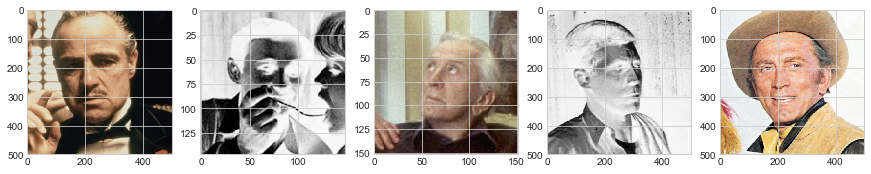

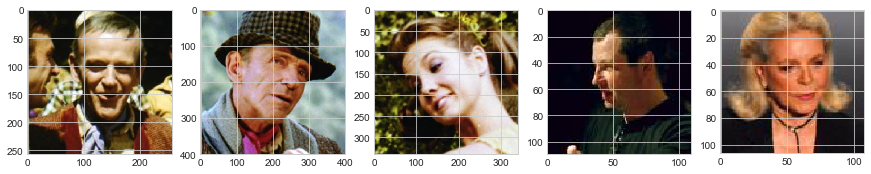

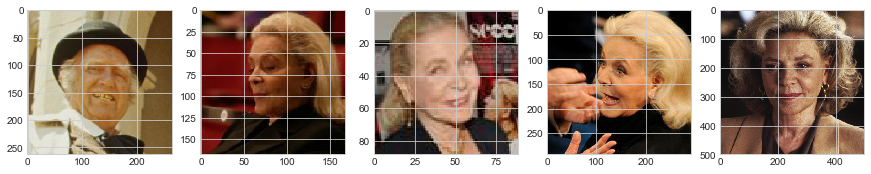

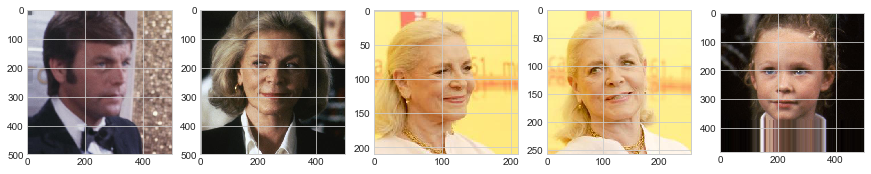

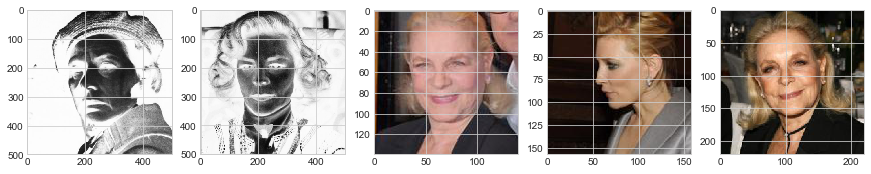

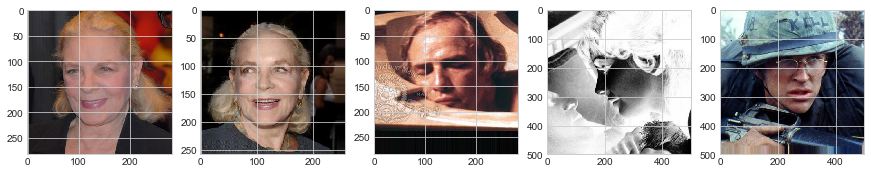

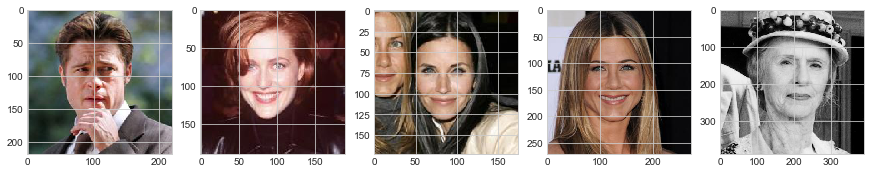

In [69]:
#Examining facescores, going from [0, 1] to [7, 8]
#From looking at the pictures, the score improves if the face is more centered and looking straight ahead
#Some pictures with food face score are still grainy and have strange colors 
scores = list(range(1, 8))
for score in scores:
    examine_faces(score)

In [6]:
#Examining pictures with higher second face scores(images that contain multiple people, may have mislabeled age)
second_face_df = full_df.loc[full_df.second_face_score > 1]

In [18]:
second_face_df.loc[second_face_df.second_face_score > 3]

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,age
8,1924,1991,data/imdb/02/nm0000002_rm1411175936_1924-9-16_...,0.0,['Lauren Bacall'],[[ 212.76723692 1055.64418461 526.79809231 13...,3.786499,3.629704,67
11,1924,1991,data/imdb/02/nm0000002_rm1646056960_1924-9-16_...,0.0,['Lauren Bacall'],[[ 72.28774564 1055.64418461 386.31860102 13...,3.767166,3.463460,67
16,1924,2006,data/imdb/02/nm0000002_rm2602605312_1924-9-16_...,0.0,['Lauren Bacall'],[[ 52.186 121.05 129.12 197.984]],4.349961,3.205523,82
21,1924,2004,data/imdb/02/nm0000002_rm2813958144_1924-9-16_...,0.0,['Lauren Bacall'],[[294.49013827 52.41849499 345.81663326 103.7...,4.344887,3.783331,80
22,1924,1974,data/imdb/02/nm0000002_rm289065984_1924-9-16_1...,0.0,['Lauren Bacall'],[[ 991.49939553 744.87654664 1430.41252351 11...,4.635294,3.911928,50
24,1924,1974,data/imdb/02/nm0000002_rm305843200_1924-9-16_1...,0.0,['Lauren Bacall'],[[1020.12114152 743.27564838 1430.36838123 11...,4.521520,3.694407,50
27,1924,2007,data/imdb/02/nm0000002_rm3487078656_1924-9-16_...,0.0,['Lauren Bacall'],[[274.80881255 63.31178573 344.66182149 133.1...,3.739849,3.190146,83
29,1924,2008,data/imdb/02/nm0000002_rm3537671424_1924-9-16_...,0.0,['Lauren Bacall'],[[ 80.61559618 58.78225177 145.55562943 123.7...,4.220183,3.544502,84
37,1924,2004,data/imdb/02/nm0000002_rm4258380288_1924-9-16_...,0.0,['Lauren Bacall'],[[1564.88234051 423.48647384 1720.8737682 5...,4.508300,3.739836,80
57,1934,1965,data/imdb/03/nm0000003_rm3244276480_1934-9-28_...,0.0,['Brigitte Bardot'],[[351.8787607 158.90809231 429.79830685 236.8...,3.700274,3.573236,31


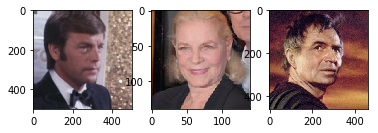

In [21]:
#Image with second face score of 2.98, 3.6, and 3.13 respectively 
plt.subplot(1, 3, 1)
img=mpimg.imread(second_face_df.iloc[2].full_path)
imgplot = plt.imshow(img)

plt.subplot(1,3,2)
img=mpimg.imread(second_face_df.iloc[8].full_path)
imgplot = plt.imshow(img)

plt.subplot(1,3,3)
img=mpimg.imread(second_face_df.iloc[154].full_path)
imgplot = plt.imshow(img)

In [22]:
#3.1 seems to be a good cutoff for the second face score
full_df = full_df.loc[(  (full_df.second_face_score.isnull()) | (full_df.second_face_score < 3.1)    )]

In [24]:
full_df.shape

(381295, 9)

## Dealing with Class Imbalance

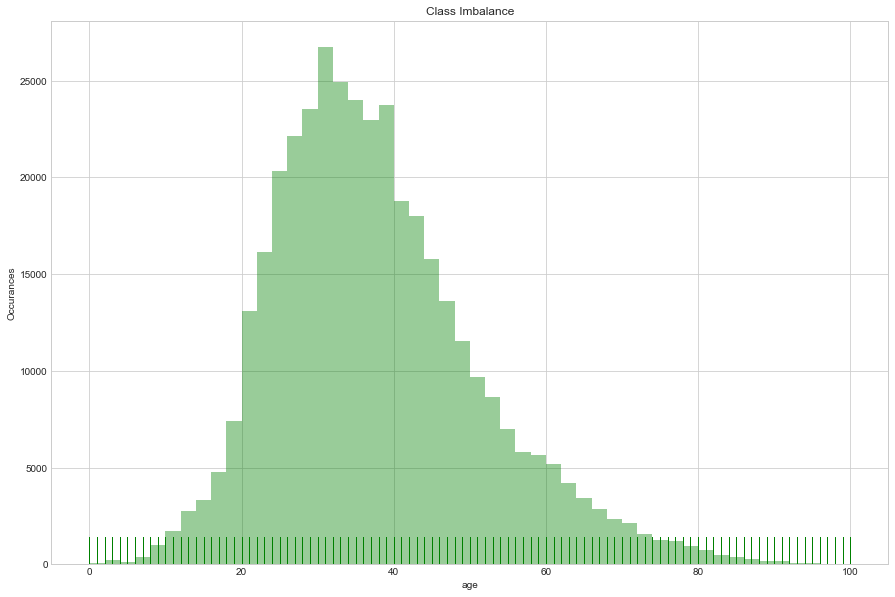

In [34]:
#Distribution of ages 
plt.style.use('seaborn-whitegrid')
plt.figure(figsize= (15, 10))
sns.distplot(full_df.age, kde= False, rug = True, color = "g" )
plt.title('Class Imbalance', )
plt.ylabel('Occurances')
plt.show()

In [48]:
full_df.loc[(full_df.age <10)].count()
#Only 1766 pictures of people less than 10

dob                  1766
photo_taken          1766
full_path            1766
gender               1712
name                 1766
face_location        1766
face_score           1766
second_face_score     877
age                  1766
dtype: int64

In [55]:
def viewcount(df, first_age, second_age):
    return df.loc[(df.age > first_age)&(df.age < second_age)].count()[0]


In [56]:
for i in list(range(10, 95, 5)):
    print("Number of instances between {} and {} is: ".format(i, i+5) ,viewcount(full_df, i, i +5))

Number of instances between 10 and 15 is:  5444
Number of instances between 15 and 20 is:  12171
Number of instances between 20 and 25 is:  32419
Number of instances between 25 and 30 is:  45664
Number of instances between 30 and 35 is:  51320
Number of instances between 35 and 40 is:  46707
Number of instances between 40 and 45 is:  34868
Number of instances between 45 and 50 is:  25130
Number of instances between 50 and 55 is:  16769
Number of instances between 55 and 60 is:  11412
Number of instances between 60 and 65 is:  8312
Number of instances between 65 and 70 is:  5223
Number of instances between 70 and 75 is:  3152
Number of instances between 75 and 80 is:  2113
Number of instances between 80 and 85 is:  1086
Number of instances between 85 and 90 is:  454
Number of instances between 90 and 95 is:  190


In [54]:
#Looking at the distribution of ages below, it makes sense to drop pictures between ages 80 and 95, and ages 0 upto 10

(381295, 9)

In [58]:
full_df = full_df.loc[(full_df.age >10) & (full_df.age<80)]

In [59]:
full_df.loc[full_df.age == 32].shape

(12944, 9)

In [60]:
model_testing_df = full_df.copy()

## Size of Images 

In [65]:
import scipy.ndimage
for i in list(range(0,5)):
    height, width, channels = plt.imread(full_df.iloc[0].full_path).shape
    print(height, width, channels)

257 257 3
257 257 3
257 257 3
257 257 3
257 257 3


In [66]:
#Moving dataframe to csv to begin modeling in another notebook 
model_testing_df.to_csv('model_data.csv', index= False)